In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv
/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')
test = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [3]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [4]:
columns = df.columns
columns = columns.drop('meantemp')
X = df[columns]
y = df['meantemp']
X

,date,humidity,wind_speed,meanpressure
0,2013-01-01,84.500000,0.000000,1015.666667
1,2013-01-02,92.000000,2.980000,1017.800000
2,2013-01-03,87.000000,4.633333,1018.666667
3,2013-01-04,71.333333,1.233333,1017.166667
4,2013-01-05,86.833333,3.700000,1016.500000
...,...,...,...,...
1457,2016-12-28,68.043478,3.547826,1015.565217
1458,2016-12-29,87.857143,6.000000,1016.904762
1459,2016-12-30,89.666667,6.266667,1017.904762
1460,2016-12-31,87.000000,7.325000,1016.100000


In [5]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(y, order=(2,1,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

                             ARIMA Model Results                              
Dep. Variable:             D.meantemp   No. Observations:                 1461
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2751.752
Method:                       css-mle   S.D. of innovations              1.591
Date:                Wed, 28 Apr 2021   AIC                           5515.503
Time:                        00:57:55   BIC                           5547.224
Sample:                             1   HQIC                          5527.336
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0014      0.043      0.032      0.974      -0.082       0.085
ar.L1.D.meantemp     1.6910      0.032     52.817      0.000       1.628       1.754
ar.L2.D.meantemp    -0.6968 

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


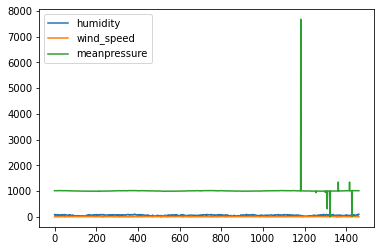

In [6]:
import matplotlib.pyplot as plt

X.plot()
plt.show()

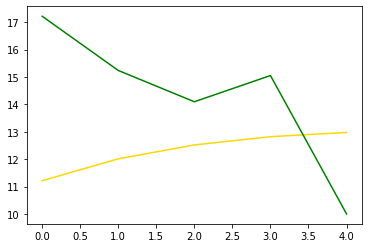

In [7]:
forecast_data = model_fit.forecast(steps=5) # 학습 데이터셋으로부터 5일 뒤를 예측합니다.

# 테스트 데이터셋을 불러옵니다.

pred_y = forecast_data[0].tolist() # 마지막 5일의 예측 데이터입니다.
test_y = y[-5:].values # 실제 5일 가격 데이터입니다.
pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
plt.plot(pred_y, color="gold") # 모델이 예상한 그래프입니다.
# plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프입니다.
# plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프입니다.
plt.plot(test_y, color="green") # 실제 그래프입니다.

In [8]:
X = X.drop('date', axis=1)
testX = test.drop(['meantemp', 'date'], axis=1)

In [9]:
testX

,humidity,wind_speed,meanpressure
0,85.869565,2.743478,59.000000
1,77.222222,2.894444,1018.277778
2,81.888889,4.016667,1018.333333
3,70.050000,4.545000,1015.700000
4,74.944444,3.300000,1014.333333
...,...,...,...
109,27.500000,5.562500,998.625000
110,39.375000,6.962500,999.875000
111,40.900000,8.890000,1001.600000
112,27.500000,9.962500,1002.125000


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X['humidity'].values.reshape(-1,1))
X1 = scaler.transform(X['humidity'].values.reshape(-1,1))

scaler.fit(X['wind_speed'].values.reshape(-1,1))
X2 = scaler.transform(X['wind_speed'].values.reshape(-1,1))

scaler.fit(X['meanpressure'].values.reshape(-1,1))
X3 = scaler.transform(X['meanpressure'].values.reshape(-1,1))


In [11]:
trainX = np.concatenate([X1, X2, X3], axis=1)
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)

In [12]:
trainX = X.values.reshape(X.shape[0], X.shape[1], 1)
testX = testX.values.reshape(testX.shape[0], testX.shape[1], 1)
trainX.shape

(1462, 3, 1)

In [13]:
test

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...,...
109,2017-04-20,34.500000,27.500000,5.562500,998.625000
110,2017-04-21,34.250000,39.375000,6.962500,999.875000
111,2017-04-22,32.900000,40.900000,8.890000,1001.600000
112,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [14]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation, GRU, Dropout

model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(3, 1)))
model.add(GRU(50, return_sequences=False, recurrent_dropout = 0.2))
model.add(Dense(1, activation='relu'))


model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 3, 100)            30900     
_________________________________________________________________
gru_1 (GRU)                  (None, 50)                22800     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 53,751
Trainable params: 53,751
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(trainX, y, epochs = 1000, batch_size = 256)

Epoch 1/1000
6/6 [==============================] - 3s 15ms/step - loss: 665.7924
Epoch 2/1000
6/6 [==============================] - 0s 13ms/step - loss: 531.1902
Epoch 3/1000
6/6 [==============================] - 0s 14ms/step - loss: 435.9400
Epoch 4/1000
6/6 [==============================] - 0s 14ms/step - loss: 370.9480
Epoch 5/1000
6/6 [==============================] - 0s 14ms/step - loss: 336.5455
Epoch 6/1000
6/6 [==============================] - 0s 14ms/step - loss: 319.0959
Epoch 7/1000
6/6 [==============================] - 0s 14ms/step - loss: 298.3953
Epoch 8/1000
6/6 [==============================] - 0s 14ms/step - loss: 294.0013
Epoch 9/1000
6/6 [==============================] - 0s 13ms/step - loss: 275.9570
Epoch 10/1000
6/6 [==============================] - 0s 13ms/step - loss: 265.3797
Epoch 11/1000
6/6 [==============================] - 0s 14ms/step - loss: 261.3213
Epoch 12/1000
6/6 [==============================] - 0s 14ms/step - loss: 253.2184
Epoch 13/1000

In [16]:
y_pred = model.predict(testX)
model.evaluate(testX, test['meantemp'])

4/4 [==============================] - 1s 3ms/step - loss: 14.6321


14.632101058959961